
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [1]:
student_number = 400101656
first_name = 'Pantea'
last_name = 'Amoie'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [3]:
# Loading the data
data = pd.read_csv('spotify.csv')

# Keeping relevant features and excluding unrelated ones
relevant_features = ["track_name", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
spotify_data = data[relevant_features].copy()

print(spotify_data.head())

                                          track_name  danceability  energy  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...         0.748   0.916   
1                    Memories - Dillon Francis Remix         0.726   0.815   
2                    All the Time - Don Diablo Remix         0.675   0.931   
3                  Call You Mine - Keanu Silva Remix         0.718   0.930   
4            Someone You Loved - Future Humans Remix         0.650   0.833   

   key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    6    -2.634     1       0.0583        0.1020          0.000000    0.0653   
1   11    -4.969     1       0.0373        0.0724          0.004210    0.3570   
2    1    -3.432     0       0.0742        0.0794          0.000023    0.1100   
3    7    -3.778     1       0.1020        0.0287          0.000009    0.2040   
4    1    -4.672     1       0.0359        0.0803          0.000000    0.0833   

   valence    tempo  
0    0.518  122.036  


In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)

In [4]:
def standard_scaler(data):
    # Mean & SD for each column
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)
    
    # Normalizing the the data
    normalized_data = (data - means) / stds
    
    return normalized_data, means, stds

# Keeping the numerical data for standardization(all except track name)
numerical_data = spotify_data.drop(columns=['track_name'])

# Performing our standard scaler function
normalized_data, means, stds = standard_scaler(numerical_data)

# Replacing original numerical data with normalized data
spotify_data.loc[:, numerical_data.columns] = normalized_data

print(spotify_data.head())


                                          track_name  danceability    energy  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...      0.642049  1.201614   
1                    Memories - Dillon Francis Remix      0.490412  0.643317   
2                    All the Time - Don Diablo Remix      0.138889  1.284529   
3                  Call You Mine - Keanu Silva Remix      0.435271  1.279002   
4            Someone You Loved - Future Humans Remix     -0.033426  0.742815   

        key  loudness      mode  speechiness  acousticness  instrumentalness  \
0  0.173200  1.367123  0.876177    -0.481362     -0.333898         -0.377953   
1  1.557627  0.585766  0.876177    -0.688642     -0.468670         -0.359177   
2 -1.211227  1.100090 -1.141322    -0.324422     -0.436799         -0.377849   
3  0.450085  0.984309  0.876177    -0.050024     -0.667642         -0.377911   
4 -1.211227  0.685151  0.876177    -0.702460     -0.432701         -0.377953   

   liveness   valence     tempo  
0 -0

# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.

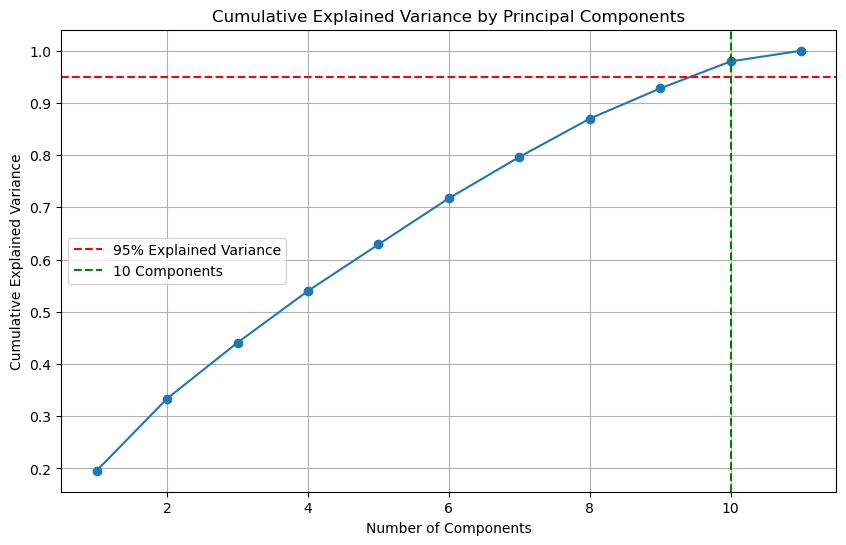

Number of components to retain is 10.
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.529562 -0.413493 -0.801224 -0.757609  0.205913 -0.735270  0.164313   
1 -1.071353 -0.692141  0.184971 -0.388387 -1.552032 -0.240224 -1.348279   
2 -1.623051 -0.452599 -0.312715 -0.411260  0.259177 -0.392731  0.935273   
3 -1.573985  0.275026 -0.225321 -0.152098 -0.188398 -0.080844  0.417950   
4 -1.062694 -0.202985 -1.828000 -0.479572  0.224482 -0.585430 -0.073120   

        PC8       PC9      PC10  
0  0.789426 -0.472417 -0.633399  
1  1.066334  0.202978 -0.351965  
2 -1.434249 -0.466281  0.128335  
3  1.217331  0.080232 -0.820031  
4 -0.409215 -0.188363  0.274141  


In [6]:
# Converting the data to a numpy array for PCA
X = normalized_data.values
pca = PCA()
pca.fit(X)

# Calculating the explained variance ratio and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plotting the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
components_required = np.argmax(cumulative_variance_ratio >= 0.95) + 1
plt.axvline(x=components_required, color='g', linestyle='--', label=f'{components_required} Components')
plt.legend()
plt.grid(True)
plt.show()

# Finding the number of components to retain based on explained variance ratio
components_required = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f'Number of components to retain is {components_required}.')

# Applying PCA with the determined number of components
pca = PCA(n_components=components_required)
reduced_features = pca.fit_transform(X)

# Converting the reduced features back to a DataFrame for further use
reduced_df = pd.DataFrame(reduced_features, columns=[f'PC{i+1}' for i in range(components_required)])
print(reduced_df.head())

# Clustering

Implement K-means for clustering from scratch.

In [7]:
np.random.seed(42)

def initialize_centroids(X, num_cluster):
    # We can initialize centroids randomly
    index = np.random.randint(0, X.shape[0], num_cluster)
    centroids = X[index]
    return centroids

def assign_to_clusters(X, centroids):
    # We assign each data point to the closest centroid
    distances = np.sqrt(((X - centroids[:, np.newaxis]) ** 2).sum(axis=2))
    return np.argmin(distances, axis=0)

def update_centroids(X, clusters, k):
    # We update the centroids based on the mean of data points in each cluster
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroids[i] = np.mean(X[clusters == i], axis=0)
    return centroids

def k_means(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    
    for _ in range(max_iters):
        clusters = assign_to_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
        
    return clusters, centroids


Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.

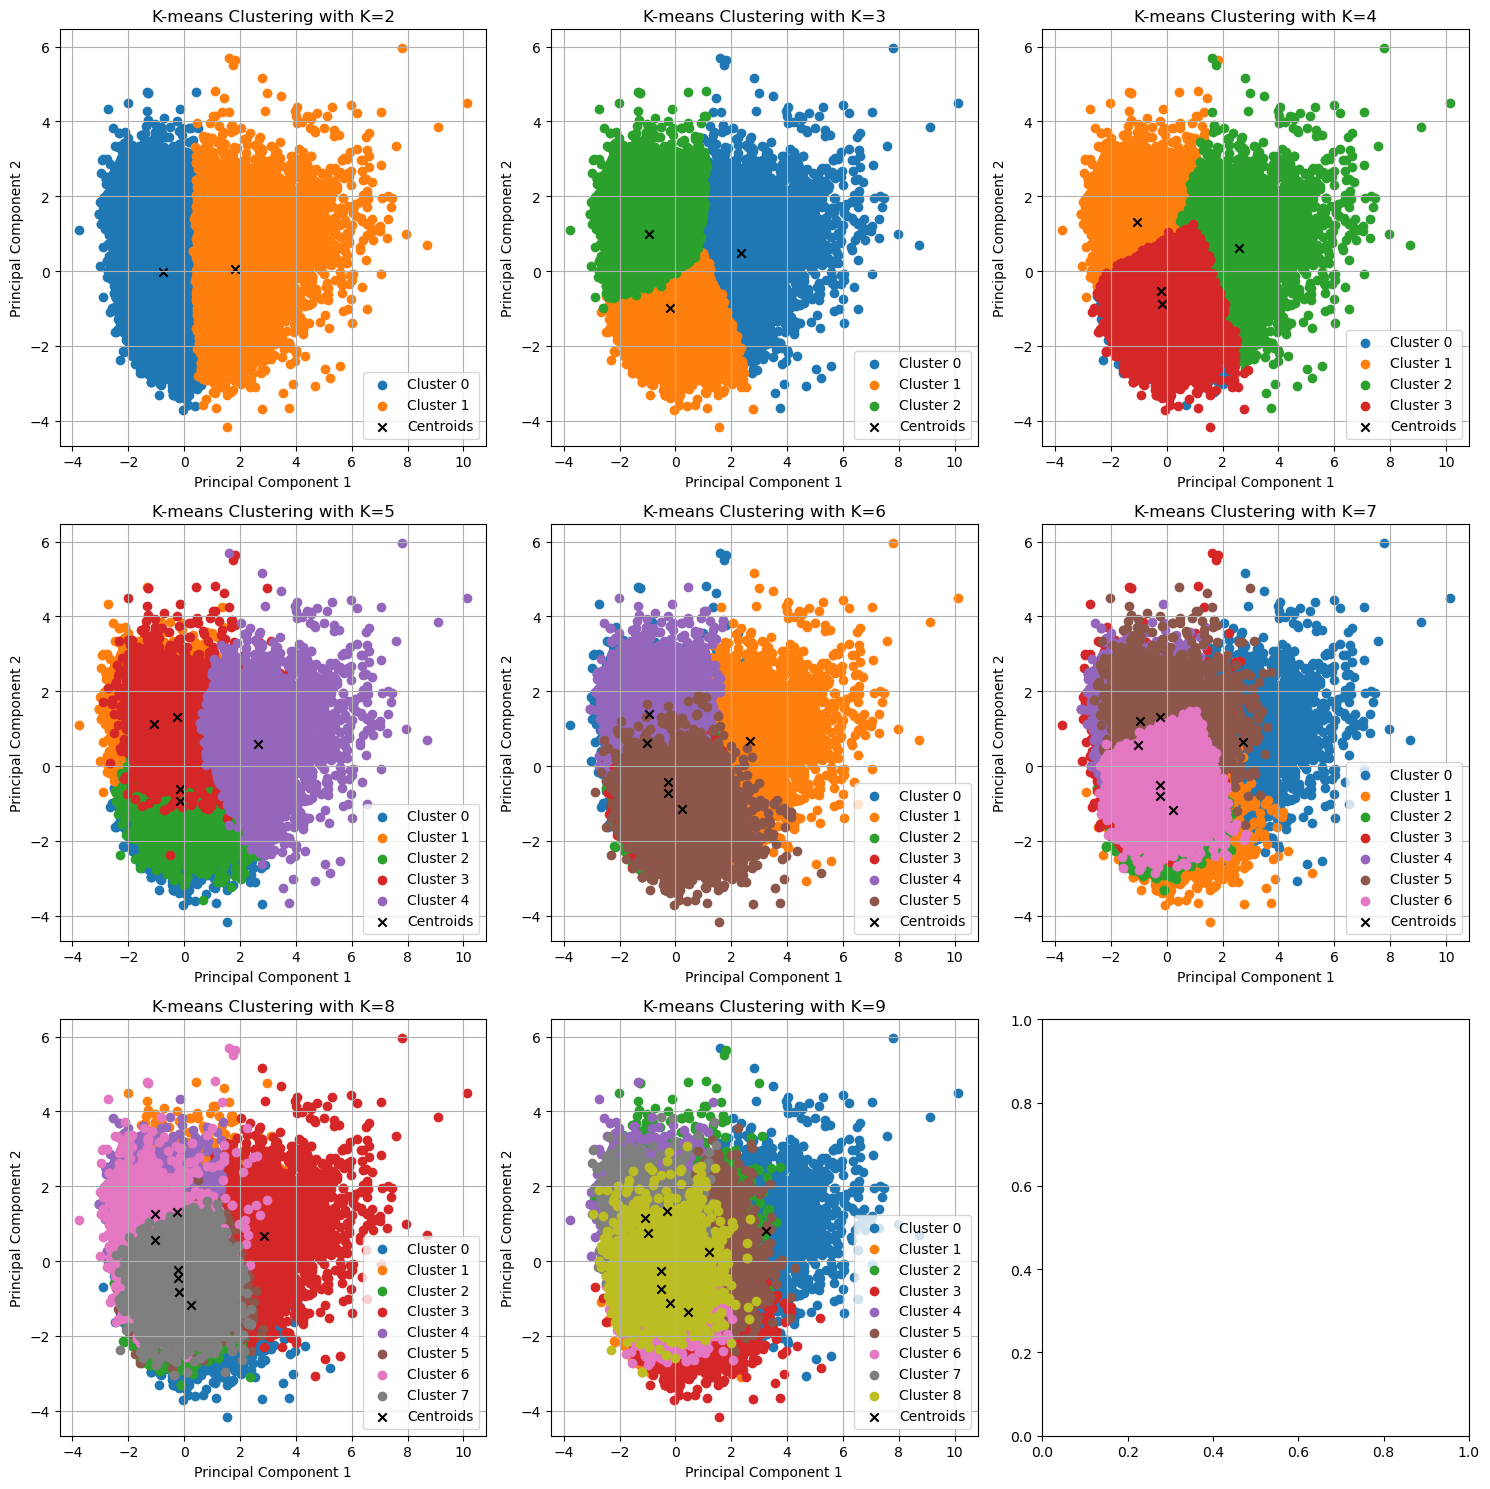

In [8]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.ravel()

for k in range(2, 10):
    # K-means clustering
    clusters, centroids = k_means(reduced_features, k)
    
    # Performing PCA for visualization (using the first two components)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(reduced_features)
    
    # Plotting clusters using first two principal components
    for cluster_idx in range(k):
        axs[k-2].scatter(X_pca[clusters == cluster_idx, 0], X_pca[clusters == cluster_idx, 1],
                         label=f'Cluster {cluster_idx}')
    axs[k-2].scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', label='Centroids')
    axs[k-2].set_title(f'K-means Clustering with K={k}')
    axs[k-2].set_xlabel('Principal Component 1')
    axs[k-2].set_ylabel('Principal Component 2')
    axs[k-2].legend()
    axs[k-2].grid(True)

plt.tight_layout()
plt.show()

The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).

**Silhouette Score:**
$ s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))} $

where:
- s(i)  is the Silhouette score for point i.
- a(i)  is the average distance between i and all other points in the same cluster (intra-cluster distance).
-  b(i)  is the average distance between i and all points in the nearest cluster (inter-cluster distance).


**WSS Score:**\
$ \text{WSS} = \sum_{i=1}^{k} \sum_{x \in C_i} \left\| x - \mu_i \right\|^2 $

where:
- $C_i$ is the i-th cluster.
- $\mu_i$ is the centroid (mean) of cluster $C_i$.
- x represents a data point in cluster $C_i$.
- $\left\| x - \mu_i \right\|^2$ calculates the squared Euclidean distance between x and $\mu_i$.

In [9]:
# ***************************
# I have implemented silhouette score function from scratch here, but beacuse it takes too long to run, I will use the built-in function.
# ***************************
def my_silhouette_score(X, clusters):
    n = len(X)
    a = np.zeros(n)
    b = np.zeros(n)
    
    for i in range(n):
        cluster_i = clusters[i]
        # Computing the average distance from point i to all other points within the same cluster
        a[i] = np.mean(np.linalg.norm(X[i] - X[clusters == cluster_i], axis=1))
        
        # Compute the average distance from point i to all points in the nearest neighboring cluster 
        b[i] = float('inf')
        for j in range(k):
            if j != cluster_i:
                # The Silhouette score aims to measure how well-separated each cluster is from its nearest neighbor. 
                # By taking the minimum distance among all other clusters, b(i) ensures that we are considering the 
                # closest neighboring cluster to which is crucial for assessing the clarity of cluster boundaries.
                b[i] = min(b[i], np.mean(np.linalg.norm(X[i] - X[clusters == j], axis=1)))
    
    silhouette_scores = (b - a) / np.maximum(a, b)
    return np.mean(silhouette_scores)

def calculate_wss(X, clusters, centroids):
    wss = 0
    # Calculating WSS based on the formula
    for i in range(len(centroids)):
        cluster_points = X[clusters == i]
        centroid = centroids[i]
        wss += np.sum((cluster_points - centroid) ** 2)
    return wss

# Evaluating Silhouette score and WSS for different numbers of clusters (k)
# k_values = range(2, 10)
# silhouette_scores = []
# wss_scores = []

# for k in k_values:
#     clusters, centroids = k_means(X, k)
#     silhouette = my_silhouette_score(X, clusters)
#     wss = calculate_wss(X, clusters, centroids)   
#     silhouette_scores.append(silhouette)
#     wss_scores.append(wss)

    
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score for K-means Clustering')

# plt.subplot(1, 2, 2)
# plt.plot(k_values, wss_scores, marker='o', linestyle='--')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Within-Cluster Sum of Squares (WSS)')
# plt.title('WSS for K-means Clustering')

# plt.tight_layout()
# plt.show()

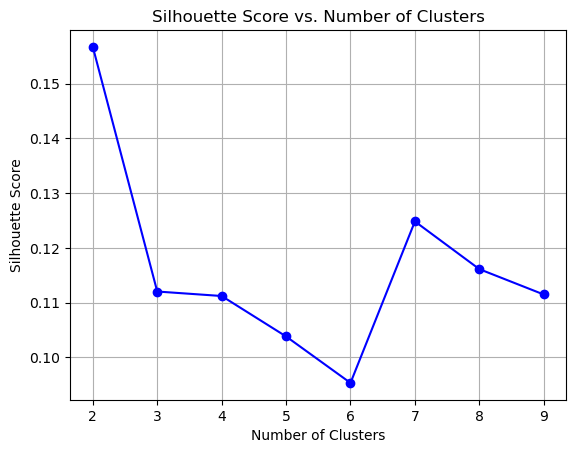

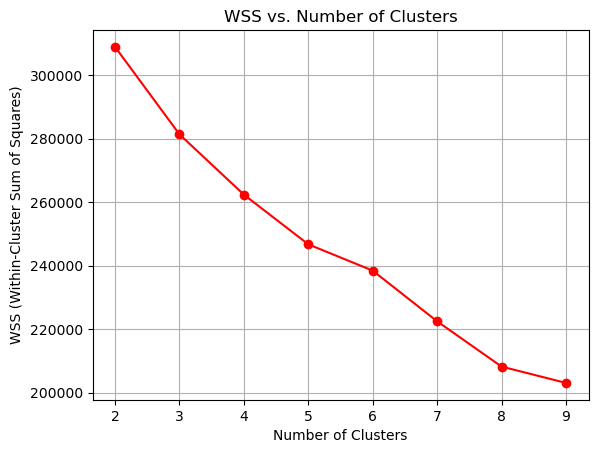

In [10]:
from sklearn.metrics import silhouette_score

# Lists to store Silhouette scores and WSS scores for different numbers of clusters
silhouette_scores = []
wss_scores = []

# Executing K-means algorithm for clusters ranging from 2 to 9 and calculate scores
for num_clusters in range(2, 10):
    clusters, centroids = k_means(reduced_features, num_clusters)
    
    # Calculating Silhouette score
    silhouette_avg = silhouette_score(reduced_features, clusters)
    silhouette_scores.append(silhouette_avg)
    
    # Calculating WSS score
    wss = calculate_wss(reduced_features, clusters, centroids)
    wss_scores.append(wss)

# Plotting the Silhouette scores
plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

# Plotting the WSS scores
plt.plot(range(2, 10), wss_scores, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS (Within-Cluster Sum of Squares)')
plt.title('WSS vs. Number of Clusters')
plt.grid(True)
plt.show()


In [1]:
from sklearn.metrics import silhouette_score

def compute_wss(data, labels, centroids):
    """
    Compute the within-cluster sum of squares (WSS) for the given clustering.

    Parameters:
    data (ndarray): The dataset.
    labels (ndarray): The cluster assignments.
    centroids (ndarray): The centroids of the clusters.

    Returns:
    float: The WSS score.
    """
    wss = 0
    for i in range(len(centroids)):
        cluster_points = data[labels == i]
        wss += np.sum((cluster_points - centroids[i]) ** 2)
    return wss

# Lists to store scores
silhouette_scores = []
wss_scores = []

# Compute scores for k ranging from 2 to 9
for k in range(2, 10):
    labels, centroids = k_means(principal_components, k)
    silhouette_scores.append(silhouette_score(principal_components, labels))
    wss_scores.append(compute_wss(principal_components, labels, centroids))

# Plot Silhouette Scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='--', color='b')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Plot WSS Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), wss_scores, marker='o', linestyle='--', color='r')
plt.title('WSS Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS Score')
plt.grid(True)

plt.tight_layout()
plt.show()


NameError: name 'k_means' is not defined

# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

In [11]:
# I chose k=3 as my optimal number of clusters, because it seems to be an elbow point in WSS plot
# Beacause at k=3, the rate of decrease slows down
k = 3
clusters, centroids = k_means(X, k)

# Function to randomly select two songs from each cluster and compare their closeness
def check_cluster_quality(X, clusters):
    for cluster_id in np.unique(clusters):
        cluster_indices = np.where(clusters == cluster_id)[0]
        if len(cluster_indices) >= 2:
            # Randomly select two songs from the cluster
            song_indices = np.random.choice(cluster_indices, size=2, replace=False)
            song1 = X[song_indices[0]]
            song2 = X[song_indices[1]]
            distance = np.linalg.norm(song1 - song2)
            print(f"Distance between two songs in cluster {cluster_id}: {distance}")

# Checking quality of clusters (by comparing distances between two random songs in each cluster)
check_cluster_quality(X, clusters)

Distance between two songs in cluster 0: 4.866345724730654
Distance between two songs in cluster 1: 3.1836948677180845
Distance between two songs in cluster 2: 2.6435993588795266


Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


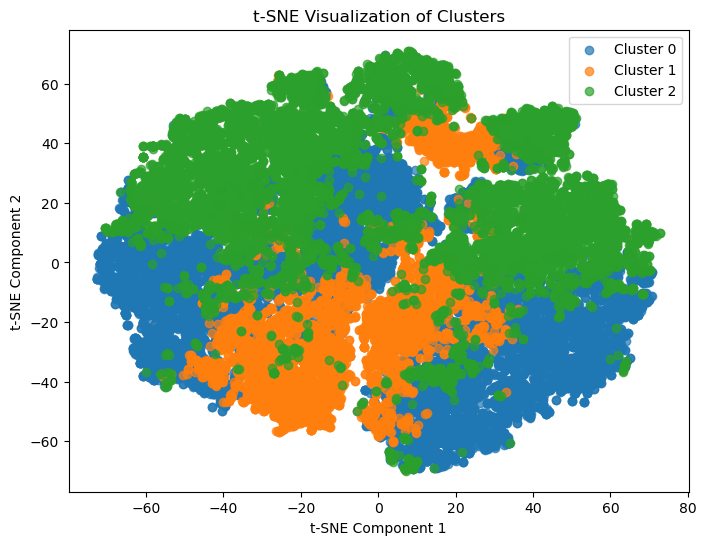

In [12]:
# Reducing dimensionality using t-SNE to visualize clusters in 2D
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plotting clusters in 2D
plt.figure(figsize=(8, 6))
for cluster_id in np.unique(clusters):
    cluster_indices = np.where(clusters == cluster_id)[0]
    plt.scatter(X_tsne[cluster_indices, 0], X_tsne[cluster_indices, 1], label=f'Cluster {cluster_id}', alpha=0.7)

plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()